# 一次変換と matplotlib

線形写像について、また、複素平面について、
プログラムを通じて勉強しましょう。


行列 A が与えられた時に、$det(A - \lambda I) = 0$ となる $\lambda$ のことを固有値、それぞれの $\lambda$ に対して、
$A \vec x = \lambda \vec x$ となる $x$ のことを固有値 $\lambda$ の固有ベクトルといいます。numpy には、linalg.eig という，固有値と固有ベクトルを返してくれる関数があります。この関数は、(固有値のベクトル, 
固有ベクトルを並べてできた行列(各列が固有ベクトル))というタプルを返します。ですので、2 つの変数のペアで返値を受け取れば，それぞれをとってこれます。

In [2]:
import numpy as np
#a = np.reshape(range(4), (2,2))
a = np.array([[1,0],[-0.5,1]])
e, v = np.linalg.eig(a)
print(e)
print(v)

[1. 1.]
[[0.0000000e+00 4.4408921e-16]
 [1.0000000e+00 1.0000000e+00]]


v は，固有ベクトルのリストではなく，v の各列が固有ベクトルだということに注意してください。

** 練習問題 **
2 次元の場合で、固有値、固有ベクトルを計算するプログラムを自分でも書いてみよう。高次元になると、方程式が高次になるので、数式処理を行い，ニュートン法などで方程式を解くなどのことを考える必要があります。

固有値，固有ベクトルの意味を考えるために，画像に対する，これらの変換による一時変換を考えてみましょう。

Python では、画像処理に、Pillow (PIL) モジュールが広く使われています。画像を表示するだけなら、次のようにして簡単にできます。

In [3]:
from PIL import Image

im = Image.open("./logo.png")
im.show()

さらに、matplotlib と組み合わせて画像を処理することもできます。簡単に，ピクセルの配列を得たり，それを表示したりできます。

(500, 500, 4)


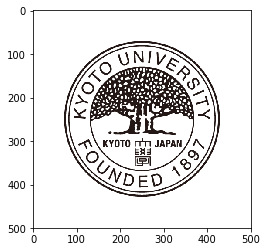

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

imarray = np.asarray(im)

#imarray は，画像のサイズ x 4 の rgba の配列
print(imarray.shape)

plt.imshow(imarray)
plt.show()

x, y の座標が[0,500]x[0,500] ではなく，[-1,1]x[-1,1] 上の画像となるようにしましょう。
白黒画像なので，[-1,1]x[-1,1]　の点の集まりとなるようにします。

imarray の shape を見ればわかるように、imarray は(500,500,4) の3次元配列です。
imarray(x,y,a) は，各点の色の a 成分 (a = 0,1,2,3 は，x, y, z, alpha) を表しています。
a = 0, すなわち，r 成分だけとってきた2次元配列を fst としましょう。
そして，fst(x,y) が 0 でない点の座標 (x, y) だけを取り出して，それを
[-1,1]x[-1,1] の範囲に座標変換した値 (x, y) のリスト original を作ります。
それに，分かりやすいように x, y 軸に並行な線をいれます。
x 成分，y 成分だけの配列 imagex, imagey を作り，それらからなる ndarray である image を作ります。

In [7]:

# 第一成分(赤)だけをとってくる。
fst= imarray[:,:,0]

#(x, y) の点が 0 でない（つまり，色がついている）所の座標を [-1, 1]x [-1,1] に変換した座標のリストを作る。
original = [((y-250)/250,((250-x)/250)) for x in range(500) for y in range(500) if fst[x,y] != 0]
# original = [(y/500,((500-x)/500)) for x in range(500) for y in range(500) if fst[x,y] != 0]

# 縦，横の線の座標も加える。
lines1 = [(x/500, y/500) for x in range(-500, 501, 250) for y in range(-500, 500)]
lines2 = [(x/500, y/500) for y in range(-500, 501, 250) for x in range(-500, 500)]
figTuple = original + lines1 + lines2

#その x　成分，y 成分の配列のペアとなる配列を作る
imagex = np.array([x for (x,y) in figTuple])
imagey = np.array([y for (x,y) in figTuple])
image = np.array([imagex, imagey])
image

array([[-0.064, -0.06 , -0.056, ...,  0.994,  0.996,  0.998],
       [ 0.716,  0.716,  0.716, ...,  1.   ,  1.   ,  1.   ]])

次に定義する showimage は、x 座標、y 座標の2つの1次元配列として点の列が与えられて、それをプロットするものです。ただし、座標は [-1,1] か、それに近い大きさの数です。(x, y) という、x, y のペアをタプルで作りそれのリストにしたいところですが、numpy の行列演算を用いて処理するために、このようにして点のリストを与えます。

matplotlib の scatter は，与えられた座標に点をうつものですが，第1引数，第2引数に，x, y 座標の他に，
x 座標の配列, y 座標の配列をとることもできます。しかし，これらをまとめた配列(すなわち img ) をとることはできません。2 引数をとる関数に，tuple を適用するのに，`*` をつければいいということは以前学びましたが，同じことは，ndarray でもできます。よって，scatter の引数に *image をわたしています。

matplotlib は，最後に plt.show() により描画を行いますが，notebook の場合には，セルの最後に行ってくれます。その方が便利なので，そのまま利用します。


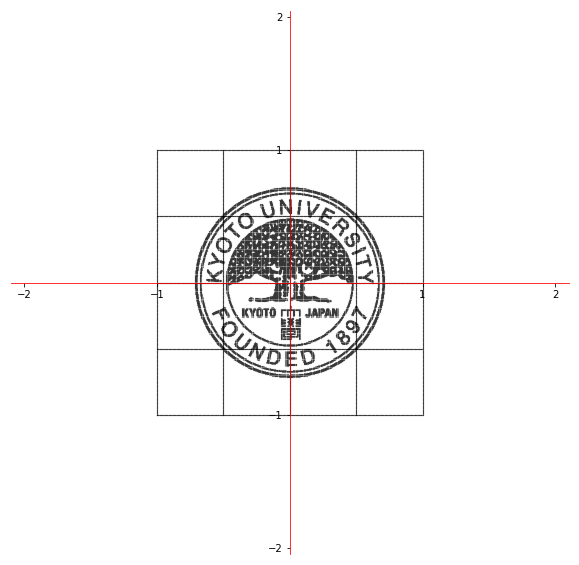

In [10]:
def showimage(image, size=2):
    """ image で与えられた点の集まりを全て plot した図を作る。size は全体の図の範囲([-size,size]x[-size,size])。"""
    fig, ax = plt.subplots(figsize=(size*5,size*5))
    ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
    plt.scatter(*image, s=0.01, c="black")  # 0,01 は点のサイズ。
    
    #表示範囲の設定
    ax.set_ylim([-size-0.1,size+0.1])
    ax.set_xlim([-size-0.1, size+0.1])
    # 座標軸の設定
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0))
        ax.spines[d].set_color('red')
    ax.set_xticks([-2,-1,1, 2])
    ax.set_yticks([-2,-1,1, 2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    plt.show()

  
showimage(image)

元の画像が白黒画像だったので，元と同じ画像が，[-1,1]x[-1,1] の範囲で作られていることが分かります。さて，image には黒い点の x座標, y 座標の列からなる配列がはいっています。
それに座標変換を行い，絵がどうなるか見てみましょう。
座標変換後の x座標, y 座標の列からなる配列を得るには，変換行列を左からかければいいはずです。

よって，次のようにして，行列で変換した点を表示できます。ここでは，a は，x 成分を2倍，y 成分はそのままという一次変換行列です。

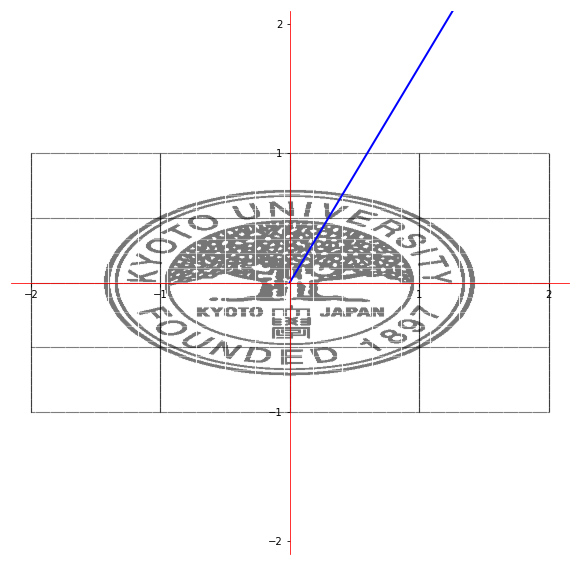

In [12]:
a = np.array([[2,0],[0,1]])
newfig = a@image
showimage(newfig)
# ライン描画。細かくは，plot のところで Shift + Tab で現れるマニュアル参照


**練習問題** 与えられた t に対して，t だけの回転行列を返すメソッドを作ろう。それをかけることにより，image を回転させた絵を作成し，描画しよう。


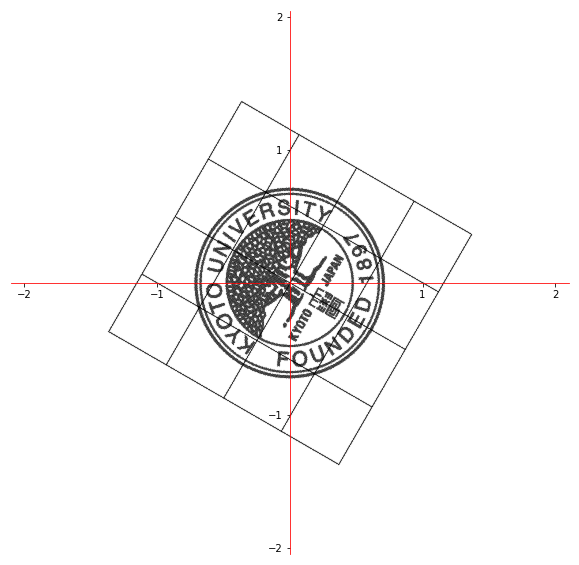

In [56]:
def rotate(t):
    u = t * np.pi/180
    a = np.array([[np.sin(u),-np.cos(u)],[np.cos(u),np.sin(u)]])
    return a

showimage(rotate(30)@image)

**練習問題** 行列 `[[a,b][c,d]]` による一次変換を行うと，(1,0) が (a,c), (0,1) が (b,d) に移ります。
そのことが分かるように，行列 v をもらい，その行列で image を一次変換した画像の上に，(a,c) および (b,d) に，赤および青の点をうった絵を描く，trans(v) を作ろう。
点は，matplotlib　の scatter 関数で打つことができる。また，matplotlib は，cell の最後までの描画命令をまとめて実行してくれるので，showimage の後に，これを行えばよい。
showimage の第2引数で size を渡すと，描画範囲を [-size,size]x[-size,size] にできる。v をもとに，適切な値をshowimage にわたして，画像が画面内に収まるようにしよう。

いろんな行列の一次変換の結果を描画しよう。

1. 角度 t の回転行列
2. (cos(t), sin(t)) と原点を結ぶ直線に対する折り返し
3. A = [[2, 1],[0.5, 1]]
4. A = [[1,0],[-0.5,1]]
4. A の 2乗，A の 3 乗　　　行列 a の n 乗は，np.linalg.matrix_power(a, n) で求まる。

[[ 0.9390708  -0.59069049]
 [ 0.34372377  0.80689822]]
[[ 0.9390708  -0.59069049]
 [ 0.34372377  0.80689822]]
[[ 0.9390708  -0.59069049]
 [ 0.34372377  0.80689822]]


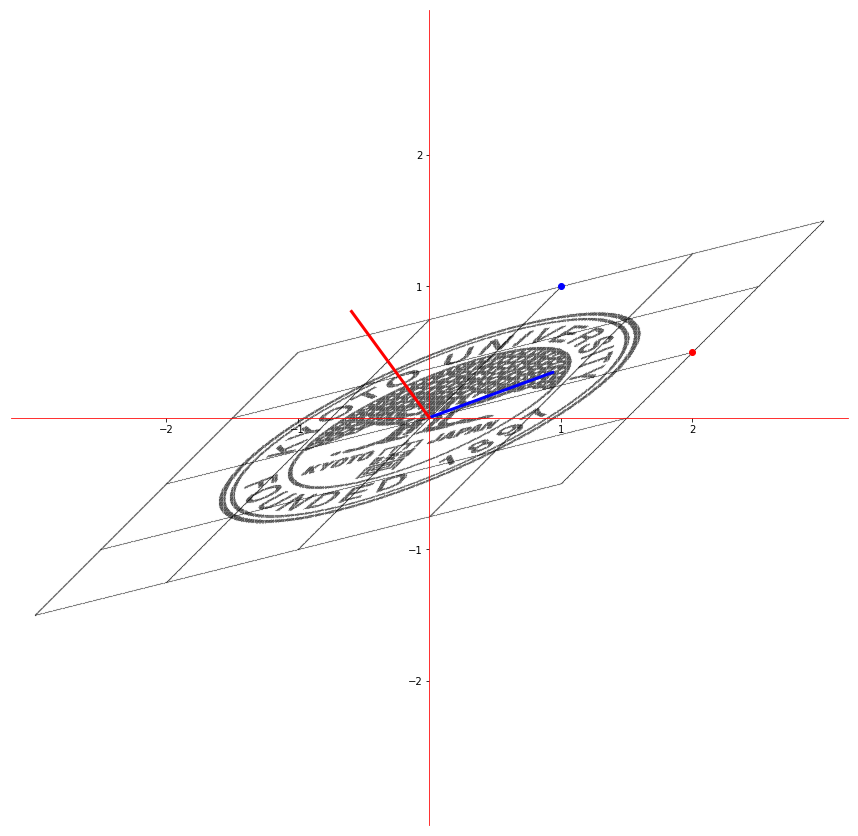

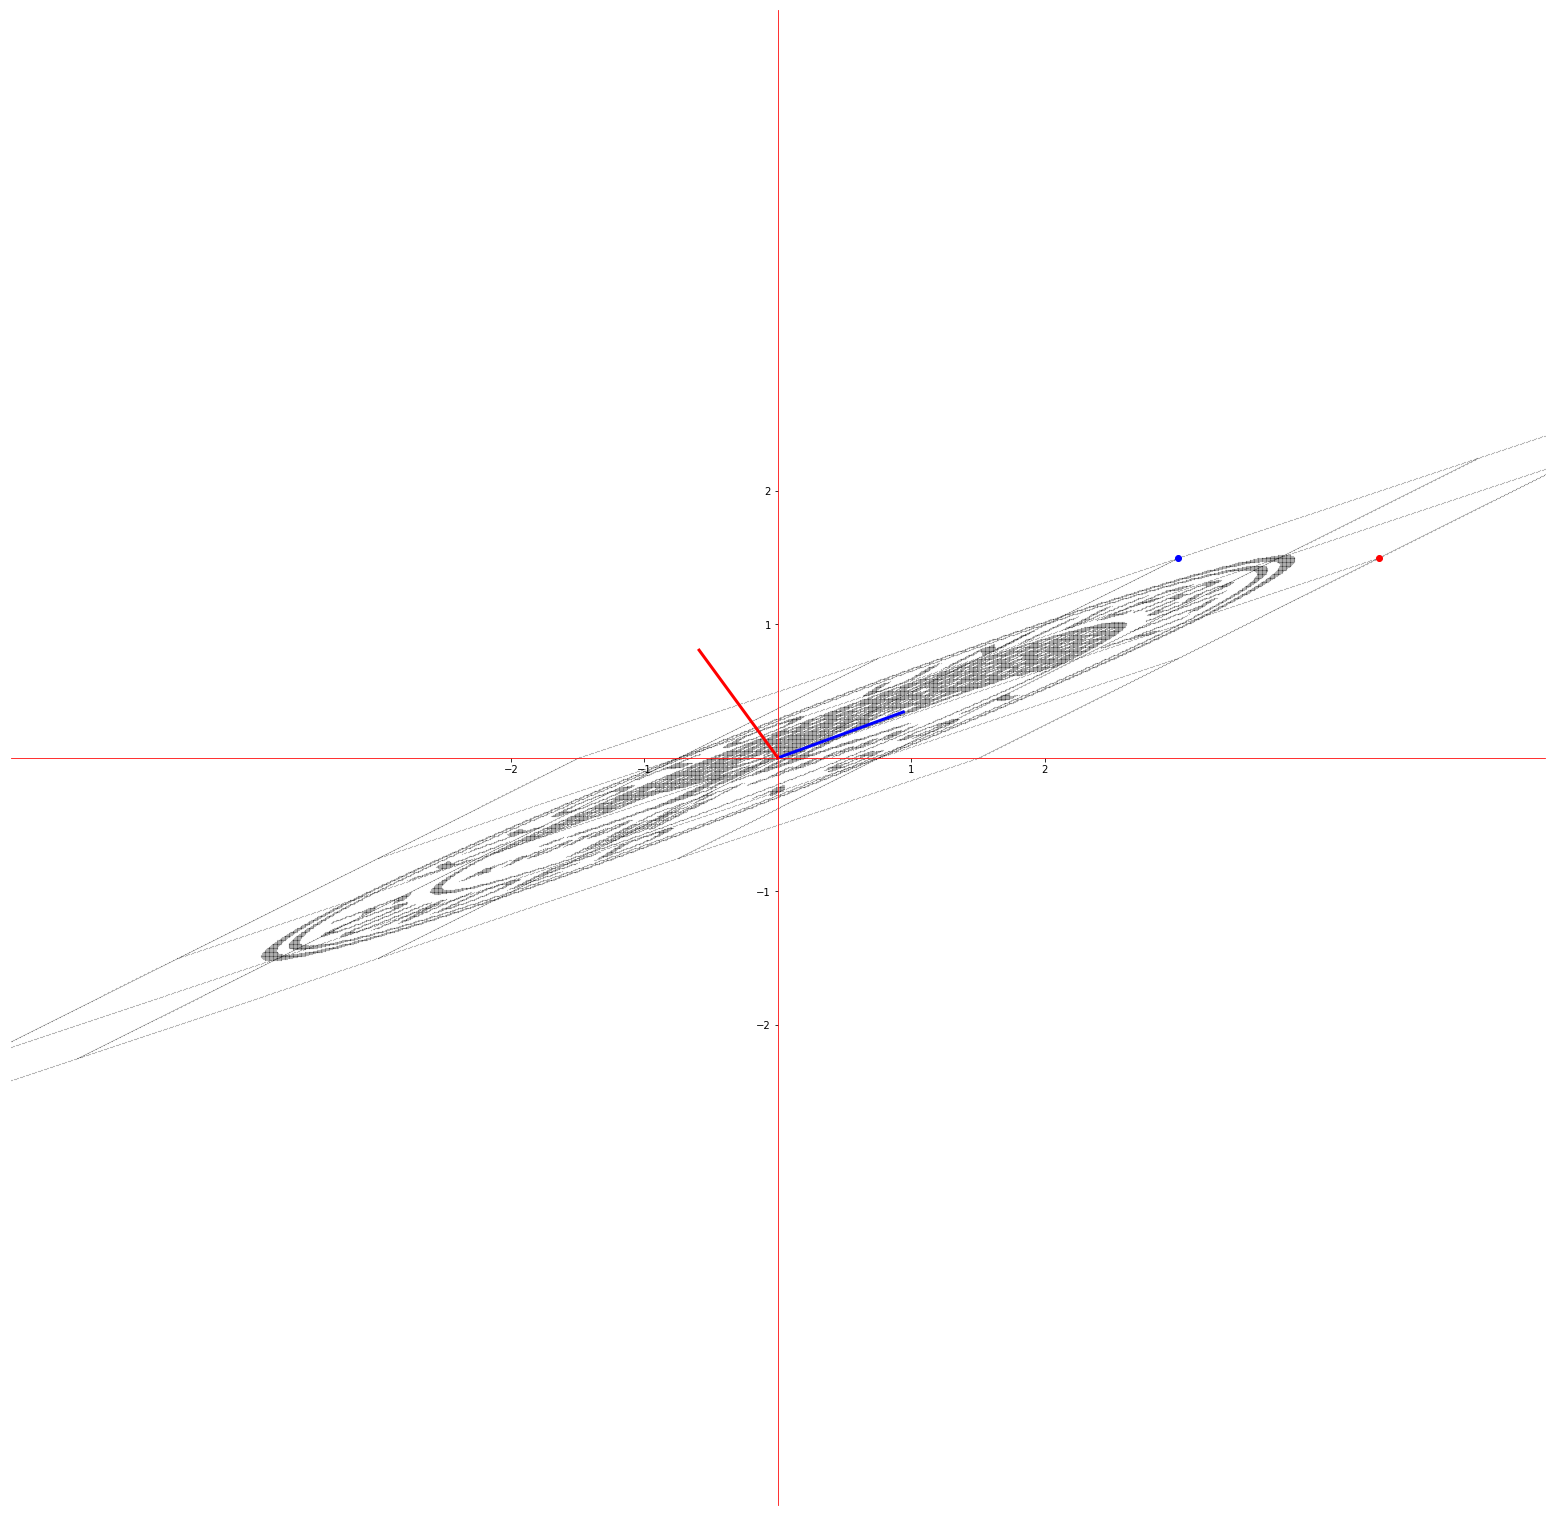

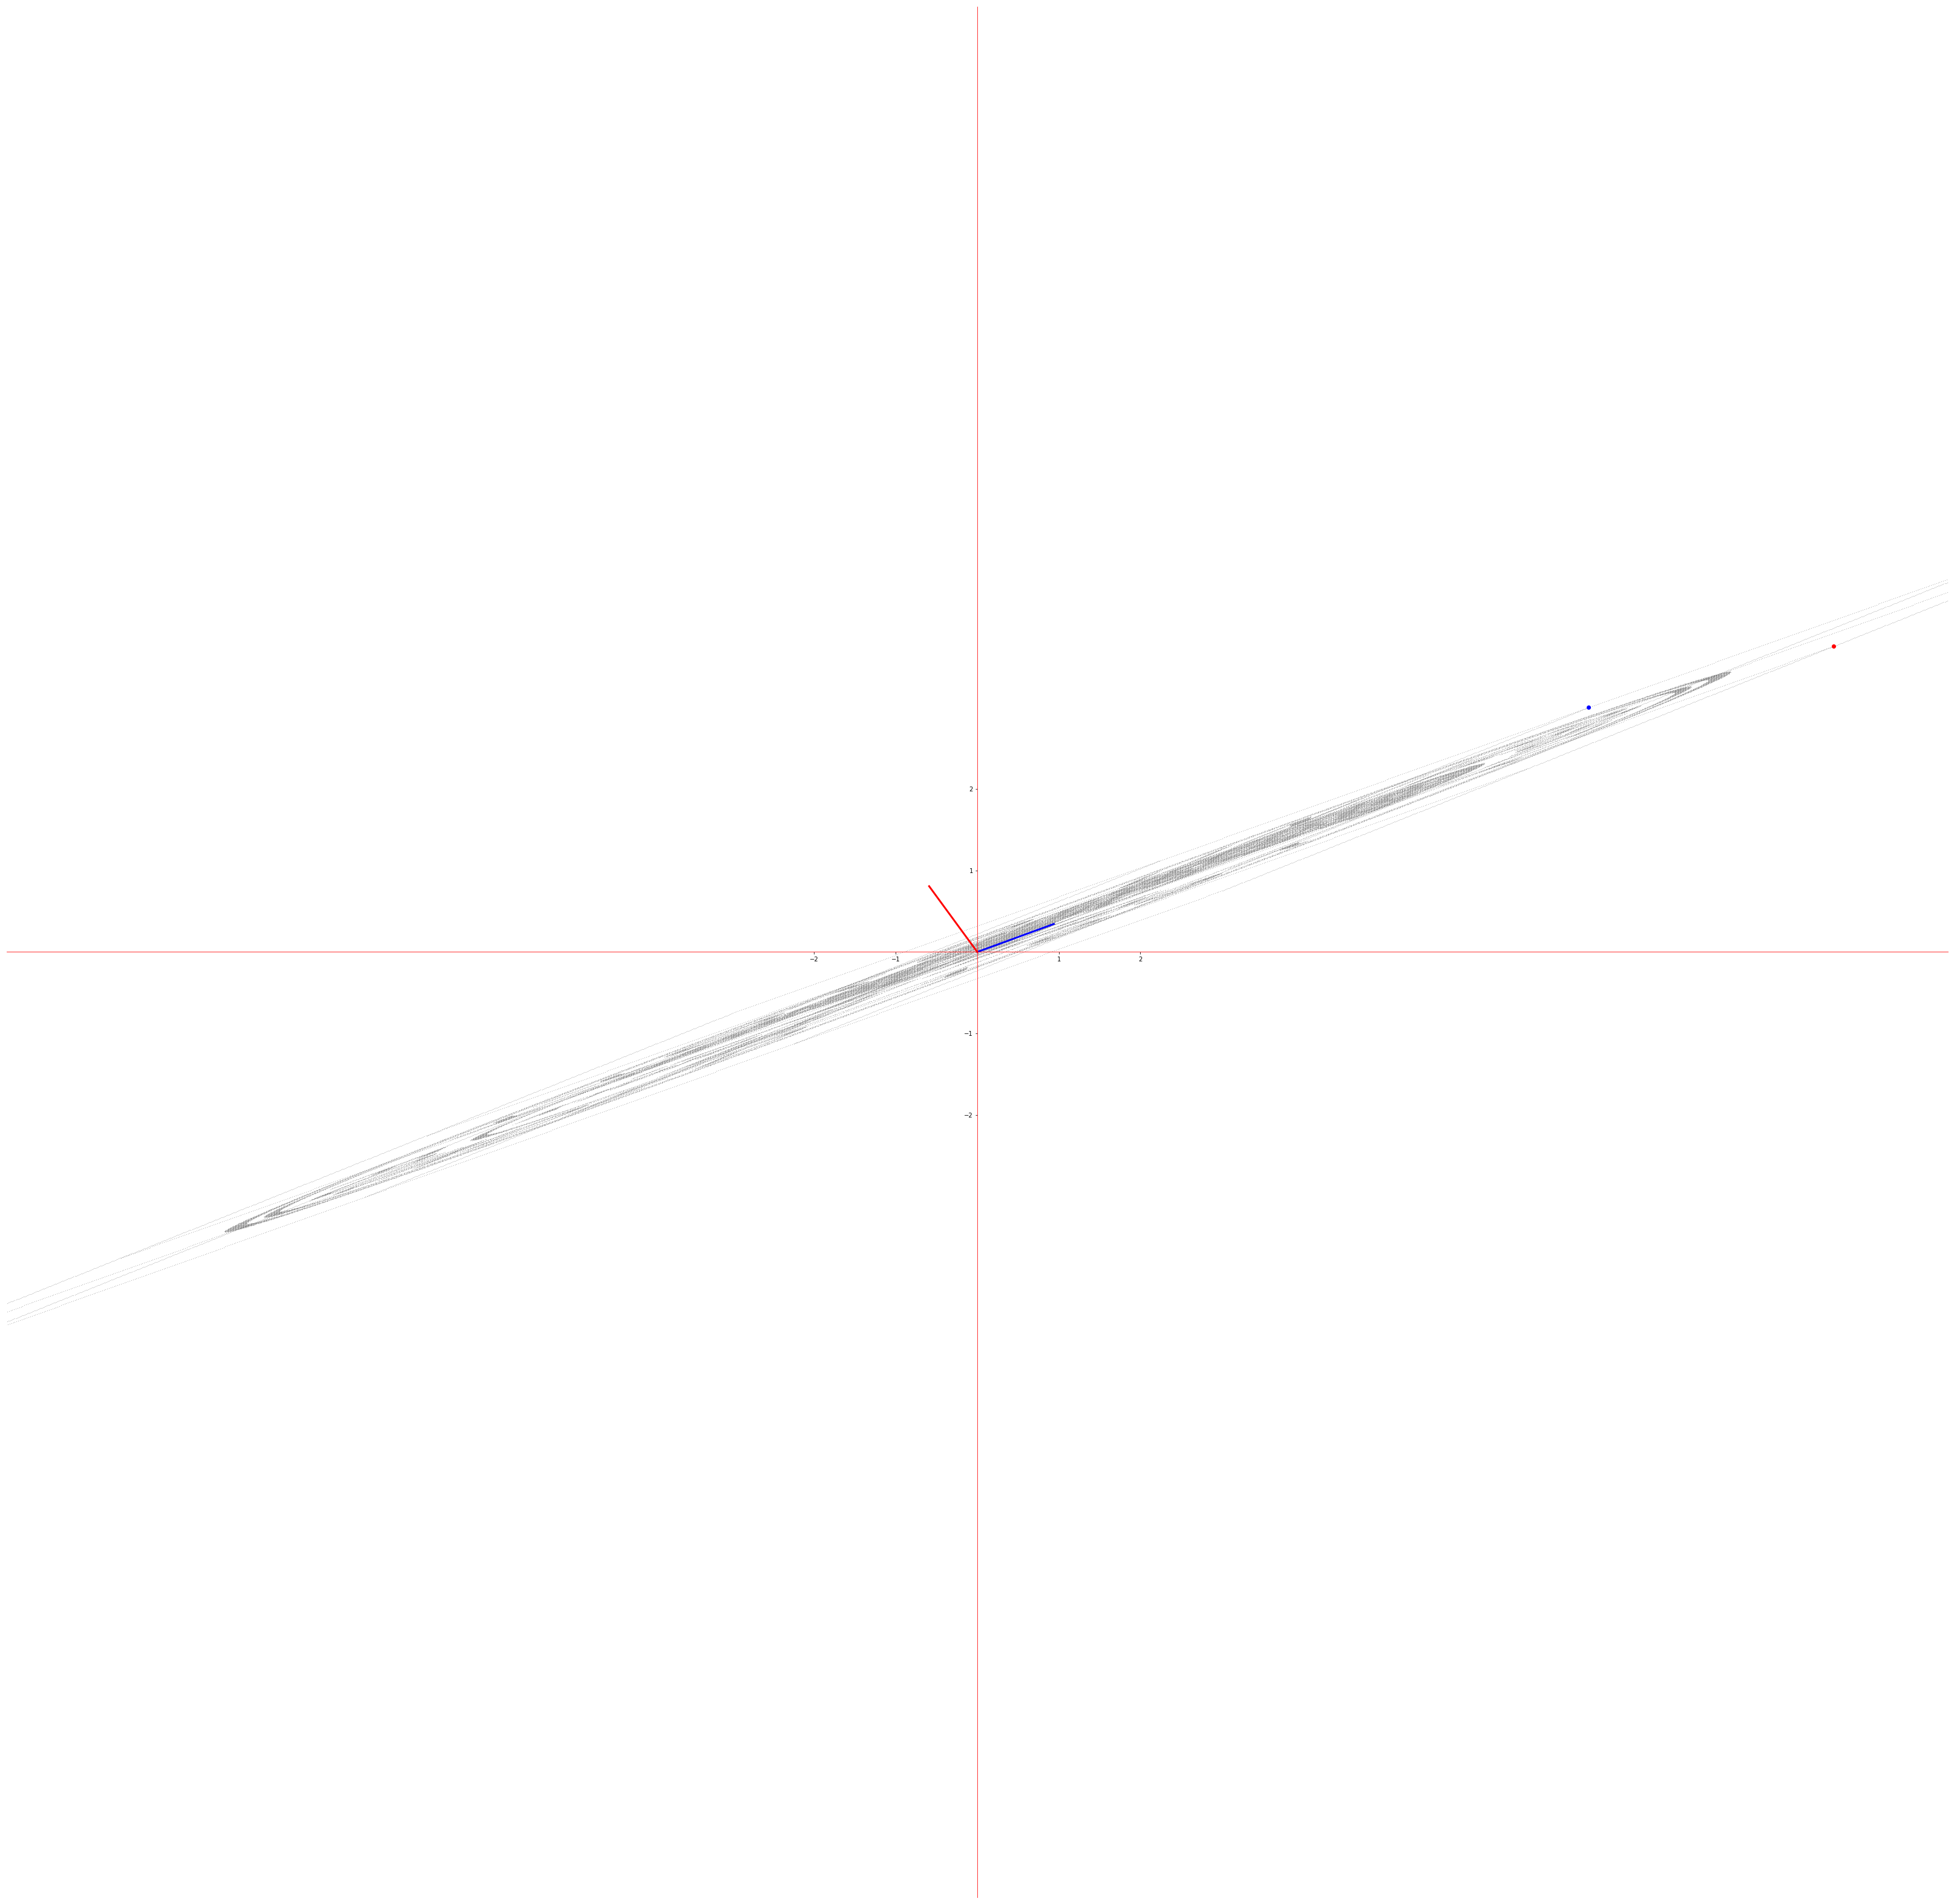

In [50]:
def trans(a):
    showimage(a@image,a.max()+1)
#    showimage(a@image)

    plt.scatter(a[0][0],a[1][0], c="red")
    plt.scatter(a[0][1],a[1][1], c="blue")
    
a = np.array([[2,1],[0.5,1]])
trans(a)
b = np.linalg.matrix_power(a, 2)
trans(b)
c = np.linalg.matrix_power(a, 3)
trans(c)

trans を，固有値を表示し，固有値が実数の時には，原点を始点とする固有ベクトルも描画するように変更した，eigen(a) を作成しよう。a が実数かどうかは，type(a) == complex で調べることができる。2点 [x0,y0], [x1,y1] を結ぶ青色の線分で幅が3 のものは，

```plt.plot([x0,x1], [y0,y1], 'b-', lw=3) ```

で描くことができる。上の練習問題のそれぞれの行列に対して新しい trans を行い，固有値と固有ベクトルの意味を確認しよう。


[[ 0.9390708  -0.59069049]
 [ 0.34372377  0.80689822]]
[[ 0.9390708  -0.59069049]
 [ 0.34372377  0.80689822]]
[[ 0.9390708  -0.59069049]
 [ 0.34372377  0.80689822]]


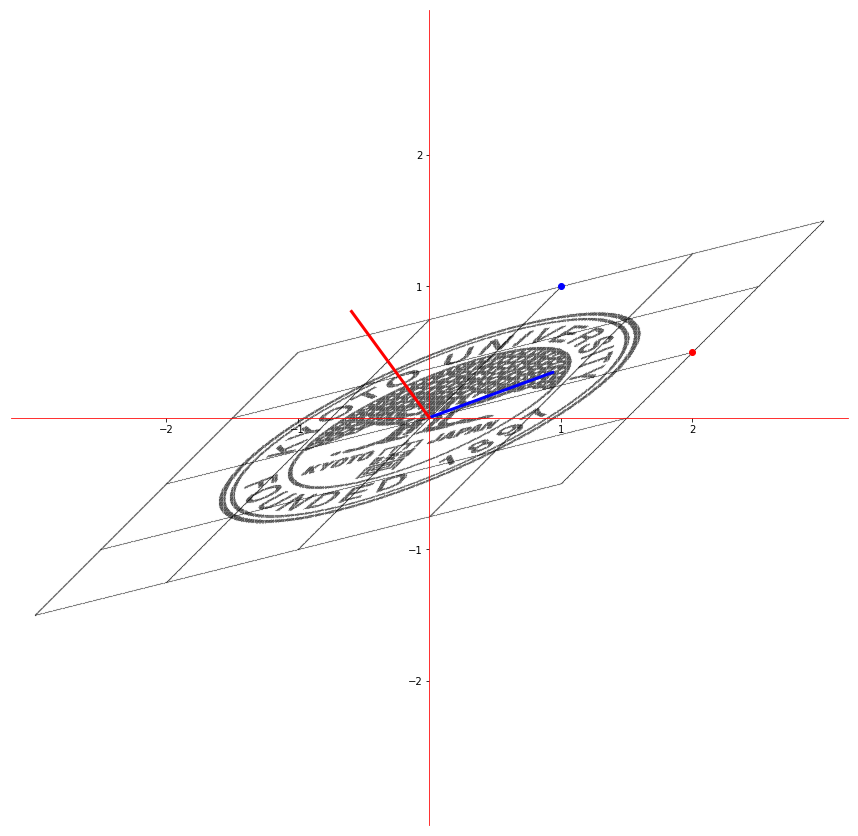

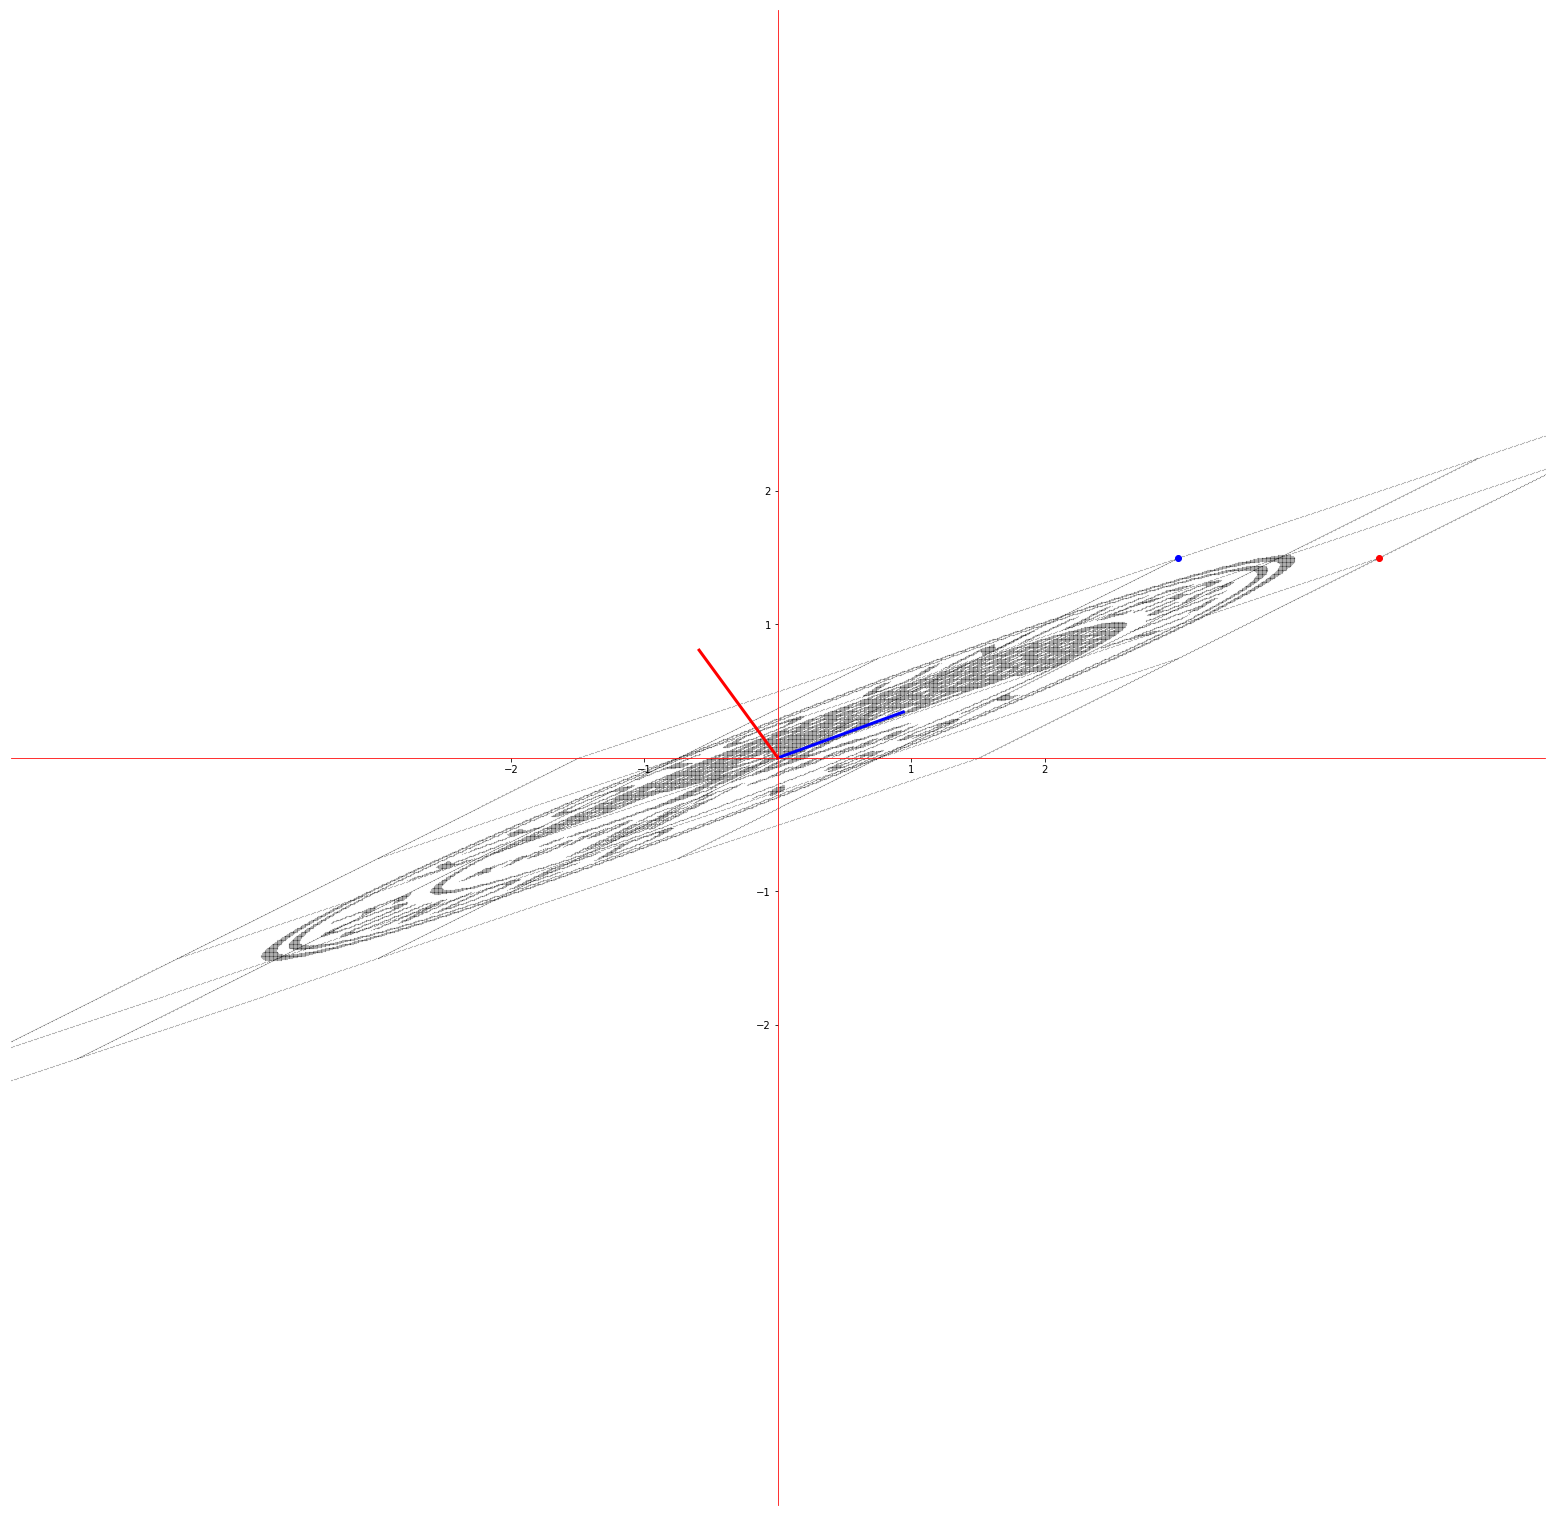

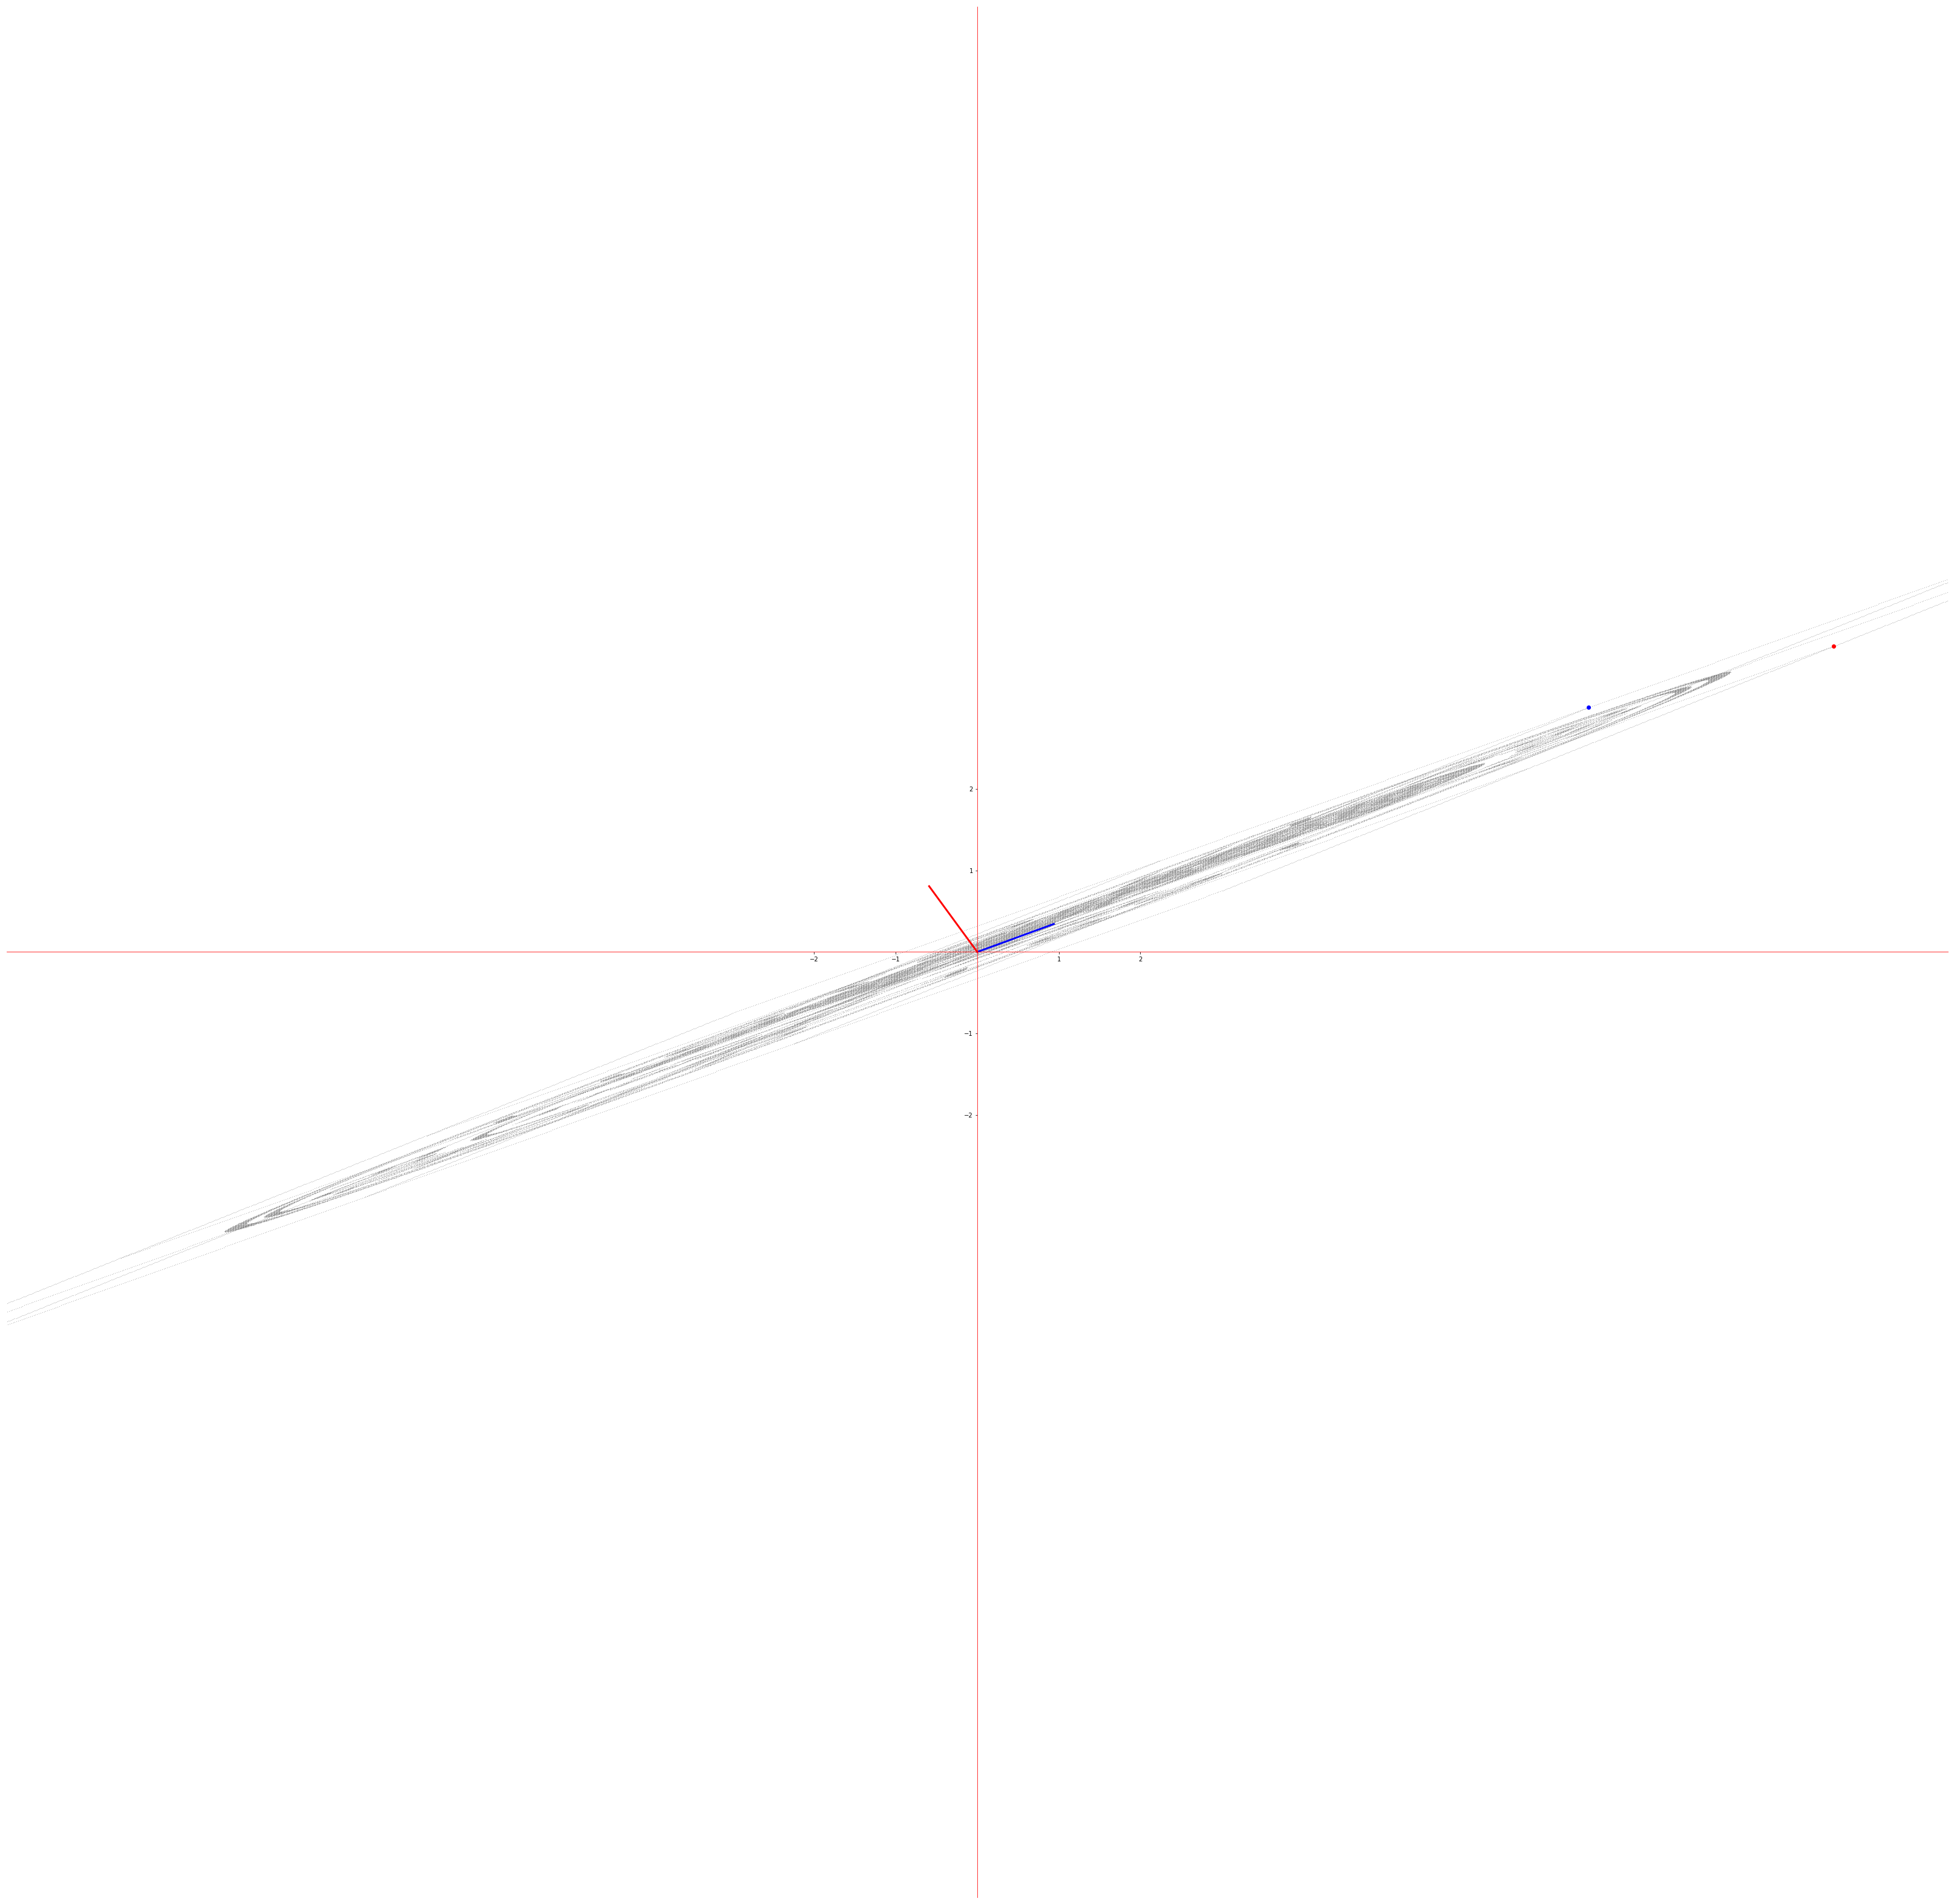

In [51]:
def eigen(a):
    showimage(a@image,a.max()+1)
#    showimage(a@image)

    plt.scatter(a[0][0],a[1][0], c="red")
    plt.scatter(a[0][1],a[1][1], c="blue")
    v, w = np.linalg.eig(a)
    print(w)
    plt.plot([0,w[0][0]],[0,w[1][0]], 'b-', lw=3)    
    plt.plot([0,w[0][1]],[0,w[1][1]], 'r-', lw=3)     



a = np.array([[2,1],[0.5,1]])
eigen(a)
b = np.linalg.matrix_power(a, 2)
eigen(b)
c = np.linalg.matrix_power(a, 3)
eigen(c)

[1. 1.]
[[0.0000000e+00 4.4408921e-16]
 [1.0000000e+00 1.0000000e+00]]


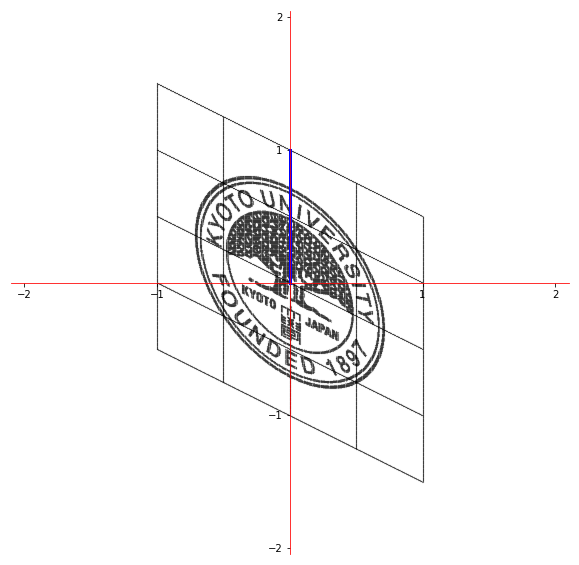

In [37]:
a = np.array([[1,0],[-0.5,1]])
#a = np.array([[2,5],[-3,8]])
showimage(a@image)
v, w = np.linalg.eig(a)
print(v)
print(w)
plt.plot([0,0],[w[0][0],w[1][0]], 'b-', lw=3) 
plt.plot([0,0],[w[0][1],w[1][1]], 'b-', lw=3) 

In [61]:
w[0][1]+ 1

1.0000000000000004

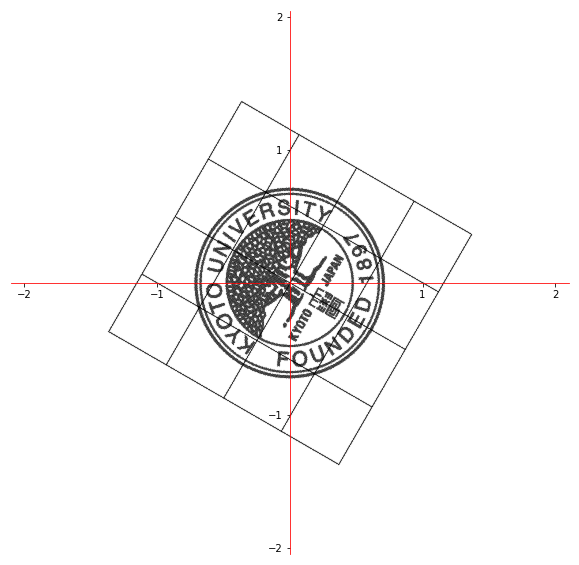

In [24]:
showimage(rotate(30, image))

**練習問題** (xx, yy) をもらい，xx, yy だけ平行移動を行うにはどうすればよいか考えましょう。
それは，(x, y) の代わりに (x, y, 1) を考えて，　
`[[1,0,xx],[0,1,yy]]` という行列との掛け算をすればよいはずです。figx の長さは，
`figx.shape[0]` でとって来れます。また，[1,1,1...,1] という大きさ n のリストは [1]*n　でできます。

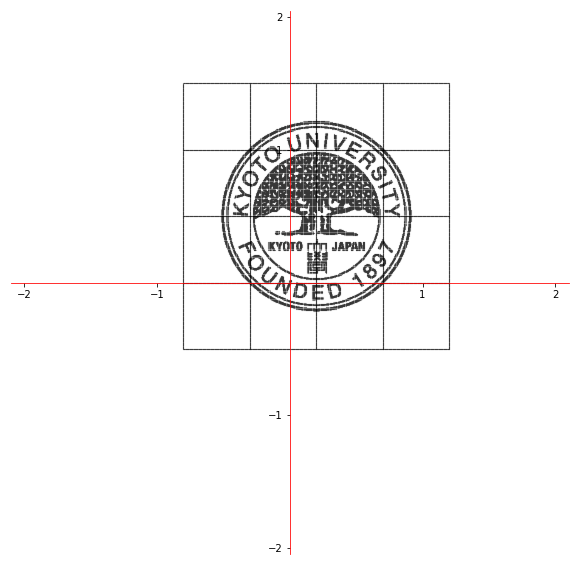

In [45]:
def trans(xx,yy):
    return np.array([[1,0,xx],[0,1,yy]])
showimage(*trans(0.2,0.5)@np.array([figx,figy,[1]*(figx.shape[0])]))

In [14]:
dir(__name__)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [15]:
a = 1


In [18]:
dir()

['In',
 'Out',
 '_',
 '_1',
 '_10',
 '_13',
 '_14',
 '_15',
 '_16',
 '_5',
 '_6',
 '_7',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'a',
 'b',
 'exit',
 'get_ipython',
 'quit']

In [19]:
type(upper)

NameError: name 'upper' is not defined